<a href="https://colab.research.google.com/github/Kishan-Ved/MLDeepLab/blob/main/Lloyds_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

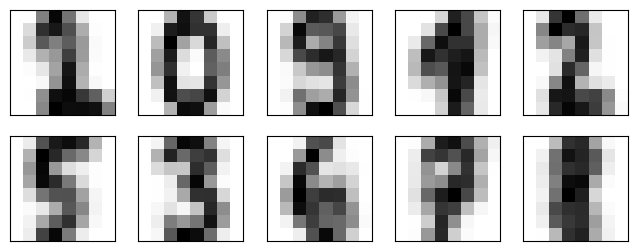

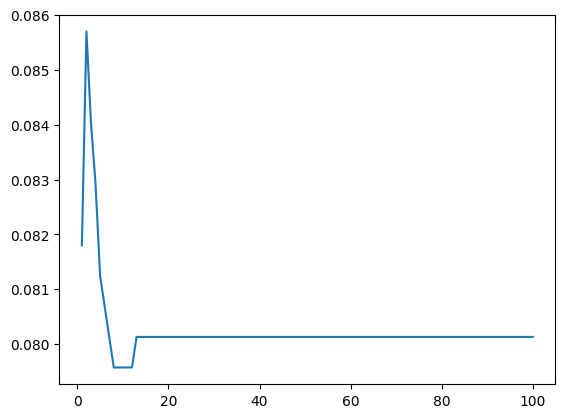

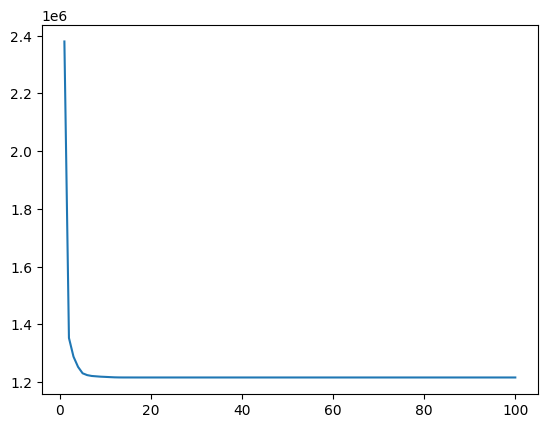

In [1]:
# k-means Lloyd's Algorithm

# Output - Cluster centers, plot of accuracy vs no. of iterations, plot of objective value vs no. of iterations 
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = load_digits().data
n,c = data.shape
k = 10
centers = data[np.random.choice(n,k,replace=False)]
score = []
cost = []
for _ in range(100):
  distances = np.zeros((n,k))
  ctr = 0
  for i in range(n):
    dist=[];
    for j in range(k):
      distances[i][j] = np.linalg.norm(data[i,:]-centers[j])
      dist.append(np.linalg.norm(data[i,:]-centers[j])**2)
    labels = np.argmin(distances,axis=1)
    ctr+=min(dist)
  cost.append(ctr)
  
  for j in range(k):
    centers[j] = np.mean(data[labels==j],axis=0)
  score.append(accuracy_score(load_digits().target,labels))
centers = centers.reshape(10, 8, 8)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[]) # Remove x and y axis ticks and labels
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    
plt.figure()
plt.plot(np.arange(1,101,1),score)

plt.figure()
plt.plot(np.arange(1,101,1),cost)

plt.show()